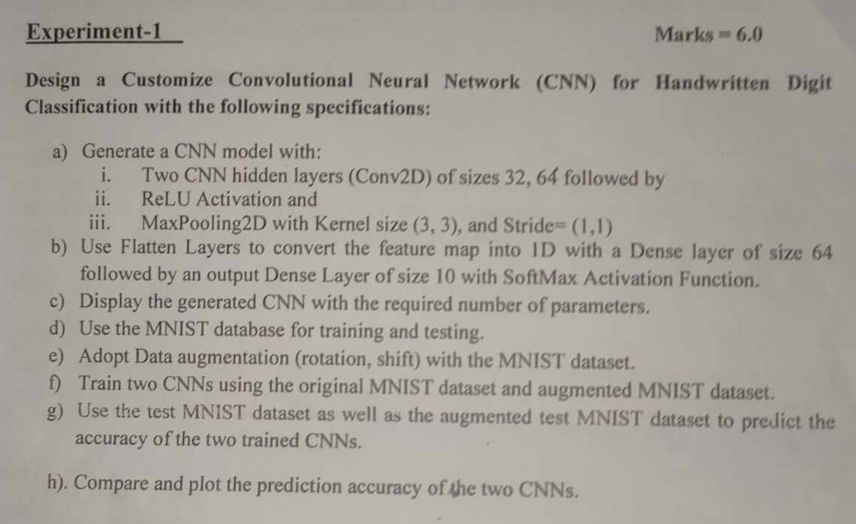

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Custom CNN Model

In [17]:
def custom_cnn():

    inputs = Input((28, 28, 1), name='Input_Layer')

    x = Conv2D(32, (3, 3), activation='relu', name='Conv_Layer_1')(inputs)
    x = MaxPooling2D((2, 2), name='Max_Pool_Layer_1')(x)
    x = Conv2D(64, (3, 3), activation='relu', name='Conv_Layer_2')(x)
    x = MaxPooling2D((2, 2), name='Max_Pool_Layer_2')(x)

    x = Flatten(name='Flatten_Layer')(x)
    x = Dense(64, activation='relu', name='Dense_Layer_1')(x)

    outputs = Dense(10, activation='softmax', name='Output_Layer')(x)

    model = Model(inputs, outputs, name='MNIST_CNN_Model')

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()

    return model

### Load MNIST Handwritten Digit Dataset

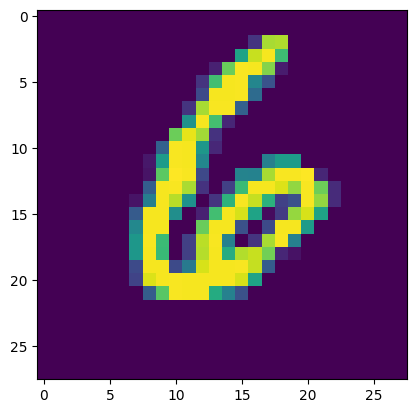

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[13])
plt.show

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Train & Test CNN on Original MNIST Dataset

In [19]:
cnn1 = custom_cnn()

cnn1_history = cnn1.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
cnn1.evaluate(x_test, y_test, verbose=2)

Model: "MNIST_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Layer_1 (Conv2D)           │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pool_Layer_1 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Layer_2 (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pool_Layer_2 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8675 - loss: 0.4400 - val_accuracy: 0.9780 - val_loss: 0.0734
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9826 - loss: 0.0607 - val_accuracy: 0.9839 - val_loss: 0.0573
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9879 - loss: 0.0392 - val_accuracy: 0.9853 - val_loss: 0.0497
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9898 - loss: 0.0321 - val_accuracy: 0.9867 - val_loss: 0.0477
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9876 - val_loss: 0.0443
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9933 - loss: 0.0206 - val_accuracy: 0.9888 - val_loss: 0.0425
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9884 - val_loss: 0.0421
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.

[0.033938296139240265, 0.9908000230789185]

### Data Augmentation

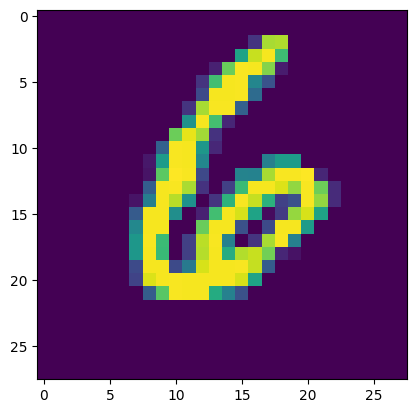

In [20]:
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest')
datagen.fit(x_train)

plt.imshow(x_train[13])
plt.show()

### Train & Test CNN on Augmented Dataset

In [21]:
cnn2 = custom_cnn()

cnn2_history = cnn2.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))
cnn2.evaluate(x_test, y_test, verbose=2)

Model: "MNIST_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Layer_1 (Conv2D)           │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pool_Layer_1 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Layer_2 (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pool_Layer_2 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7854 - loss: 0.6532 - val_accuracy: 0.9817 - val_loss: 0.0559
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9585 - loss: 0.1339 - val_accuracy: 0.9867 - val_loss: 0.0426
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9715 - loss: 0.0914 - val_accuracy: 0.9898 - val_loss: 0.0295
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9765 - loss: 0.0777 - val_accuracy: 0.9872 - val_loss: 0.0368
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9812 - loss: 0.0616 - val_accuracy: 0.9893 - val_loss: 0.0320
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9836 - loss: 0.0552 - val_accuracy: 0.9897 - val_loss: 0.0345
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9846 - loss: 0.0500 - val_accuracy: 0.9914 - val_loss: 0.0219
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9856 - loss: 0.0474 - 

[0.02248723991215229, 0.9926999807357788]

### Performance Comparison

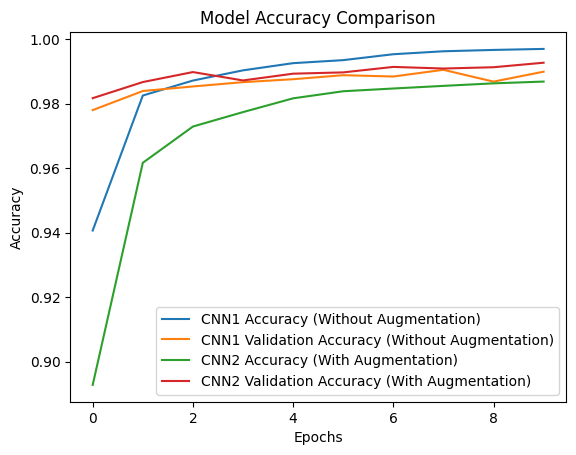

In [22]:
plt.plot(cnn1_history.history['accuracy'], label='CNN1 Accuracy (Without Augmentation)')
plt.plot(cnn1_history.history['val_accuracy'], label='CNN1 Validation Accuracy (Without Augmentation)')
plt.plot(cnn2_history.history['accuracy'], label='CNN2 Accuracy (With Augmentation)')
plt.plot(cnn2_history.history['val_accuracy'], label='CNN2 Validation Accuracy (With Augmentation)')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close()

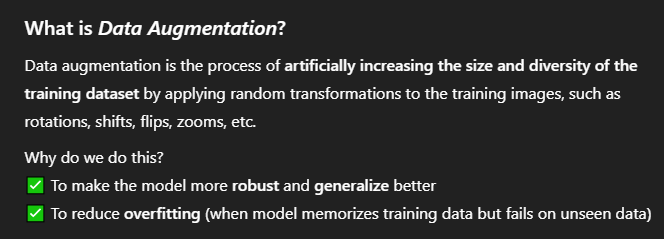

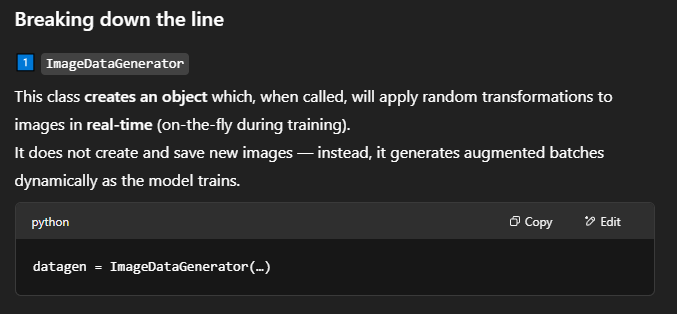

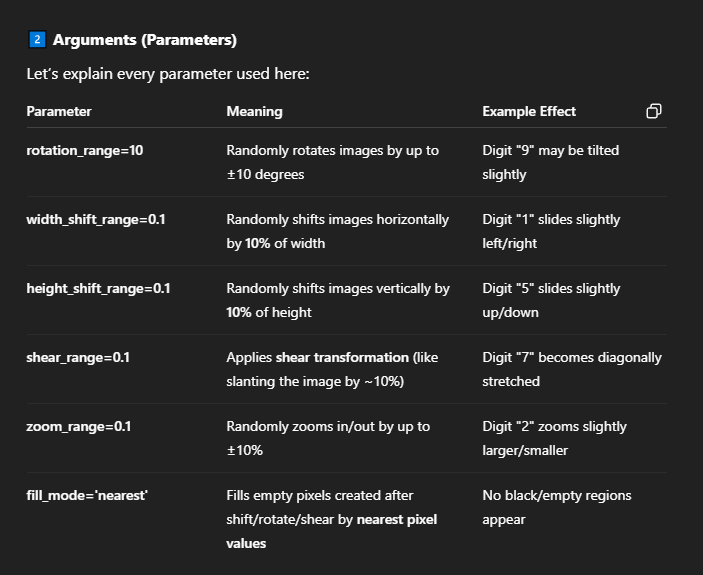

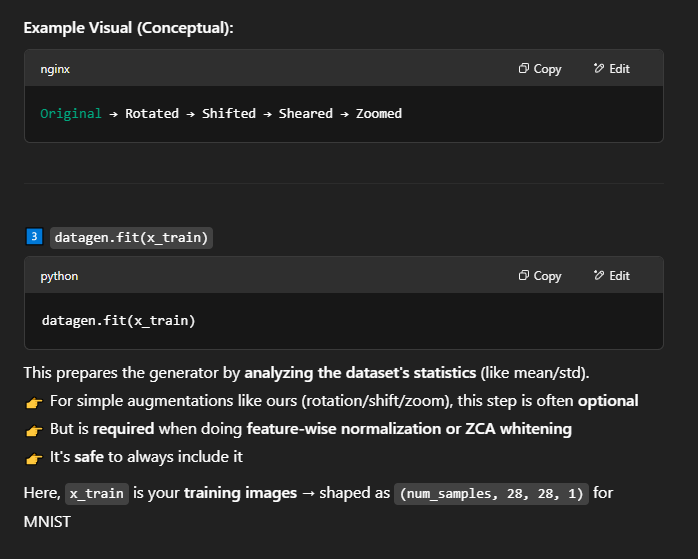

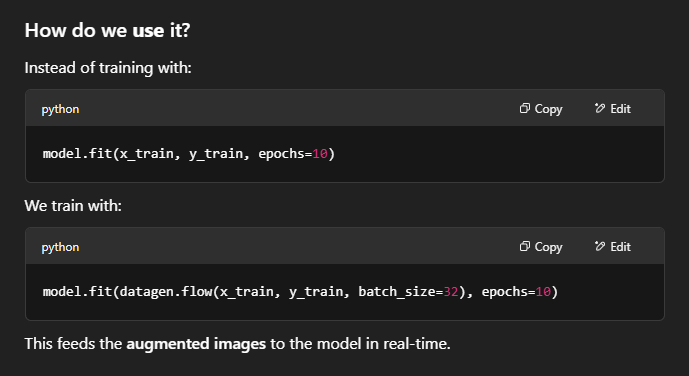

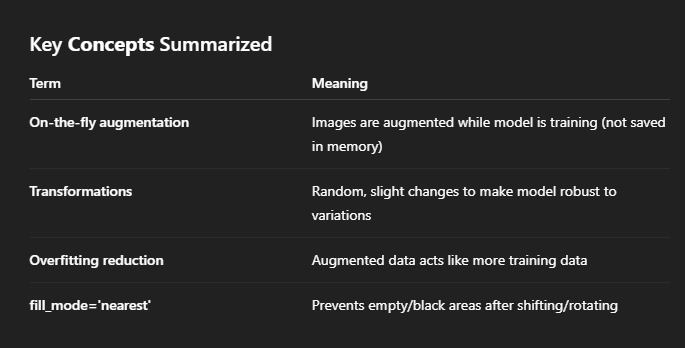